# Text classification using LSTM

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop

from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
%matplotlib inline

In [26]:
df=pd.read_csv(r'D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\spam.csv',delimiter=',',encoding='latin-1')

In [27]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


C:\Users\adeel\AppData\Local\Temp\ipykernel_2940\1560956903.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="v1", data=df, palette="hls")


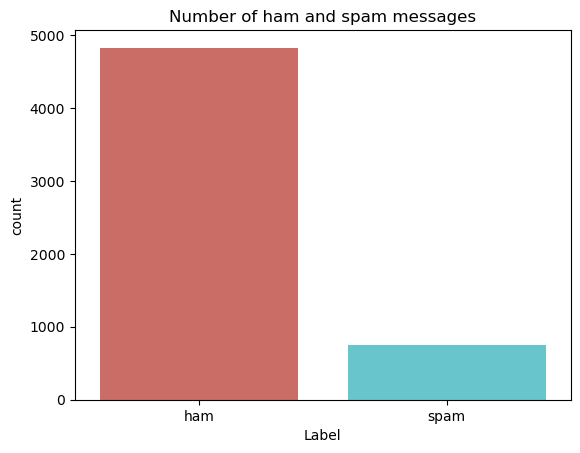

In [28]:
sns.countplot(x="v1", data=df, palette="hls")
plt.xlabel('Label')
plt.title('Number of ham and spam messages') # to make both categories of different colors
plt.show()


In [29]:
X=df.v2
Y=df.v1
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)


In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [31]:
# tokenization
# A good way to convert text data into a format that can be used by machine learning algorithms is to convert the text into a matrix of token counts. This is called a Bag-of-Words model. We can do this using the Tokenizer class provided by the Keras API.
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [32]:
def RNN():
    input=Input(name='inputs',shape=[max_len])
    layer=Embedding(max_words,50,input_length=max_len)(input)
    layer=LSTM(64)(layer)
    layer=Dense(256,name='FC1')(layer)
    layer=Activation('relu')(layer)
    layer=Dropout(0.5)(layer)
    layer=Dense(1,name='out_layer')(layer)
    layer=Activation('sigmoid')(layer)
    model=Model(inputs=input,outputs=layer)
    return model

In [33]:
model=RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 150, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.8176 - loss: 0.4707 - val_accuracy: 0.9589 - val_loss: 0.2283
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.9503 - loss: 0.1836 - val_accuracy: 0.9789 - val_loss: 0.1219
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.9752 - loss: 0.0982 - val_accuracy: 0.9863 - val_loss: 0.0582
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9809 - loss: 0.0644 - val_accuracy: 0.9884 - val_loss: 0.0523
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9888 - loss: 0.0426 - val_accuracy: 0.9895 - val_loss: 0.0519
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9902 - loss: 0.0348 - val_accuracy: 0.9905 - val_loss: 0.0517
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.9935 - loss: 0.0267 - val_accuracy: 0.9895 - val_loss: 0.0547


In [49]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [50]:
accr=model.evaluate(test_sequences_matrix,Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9821 - loss: 0.0550


In [51]:
testing_context = ["I am watching here?"]

In [52]:
txts=tok.texts_to_sequences(testing_context)
txts=sequence.pad_sequences(txts,maxlen=max_len)

In [53]:
pred=model.predict(txts)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0.00020305]]


In [54]:
# prediction seems to be correct because value is very low 0.007852

In [20]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

In [21]:
# Training parameters.
batch_size = 32
num_classes = 10
epochs = 2

In [22]:
# Embedding dimensions.
row_hidden = 128
col_hidden = 128

In [23]:
# Split the data into training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
# Reshape data into 4D for Hierarchical RNN.
# HRNN can learn across multiple levels of temporal hierarchy over a complex sequence.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# 28, 28: These values refer to the height and width of each image. In this case, the images are being reshaped into 28x28 pixel dimensions,
#  which is common for datasets like MNIST, where each image is 28x28 pixels in size.
# 1: This is the number of channels. For grayscale images, there is only one channel, hence the value 1. 
# If the images were in RGB color, this value would be 3 (representing Red, Green, and Blue channels).
x_test=x_test.reshape(x_test.shape[0], 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



In [25]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
 # convert class vecors to binary class matrices
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)
row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

In [27]:
encoded_rows=TimeDistributed(LSTM(row_hidden))(x)
encoded_columns=LSTM(col_hidden)(encoded_rows)

In [28]:
# Final prediction
prediction=Dense(num_classes,activation='softmax')(encoded_columns)
model=Model(x,prediction)

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [30]:
# Reshape target data to match the output shape
y_train = y_train.reshape(-1, num_classes)
y_test = y_test.reshape(-1, num_classes)

# training 
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1225s 631ms/step - accuracy: 0.6801 - loss: 0.9045 - val_accuracy: 0.9692 - val_loss: 0.1022
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1196s 638ms/step - accuracy: 0.9619 - loss: 0.1261 - val_accuracy: 0.9777 - val_loss: 0.0701
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1144s 610ms/step - accuracy: 0.9732 - loss: 0.0849 - val_accuracy: 0.9816 - val_loss: 0.0610
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1108s 591ms/step - accuracy: 0.9807 - loss: 0.0655 - val_accuracy: 0.9856 - val_loss: 0.0459
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1112s 593ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.9833 - val_loss: 0.0534


In [31]:
scores=model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.05343633517622948
Test accuracy: 0.983299970626831


# Google stock market price data

In [84]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csvdataset_train=pd.read_csv("D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values # The values attribute is used to convert a 
# pandas DataFrame or a subset of it into a NumPy array

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_train.shape[0]: This is the number of samples or sequences in the dataset. 
# For example, if you have 1000 time-series sequences, X_train.shape[0] would be 1000.

# X_train.shape[1]: This represents the number of time steps (or features) in each sample. 
# In your case, each sequence consists of 60 timesteps (because you used i-60:i in the previous code), 
# so X_train.shape[1] would be 60.

# 1: The last dimension, 1, indicates the number of features at each timestep. 
# Since you are dealing with a single feature (like stock prices or sales data), this value is 1.


# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)





c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - loss: 0.0967
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0051
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0045
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0046
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0050
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0043
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0045
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0047
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0041
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0047
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


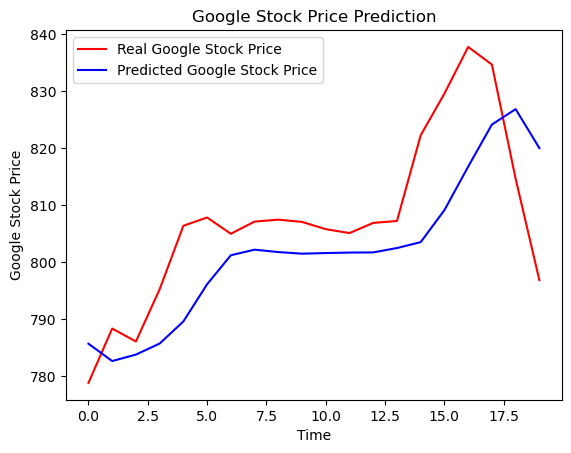

In [85]:
# Getting the real stock price of 2017
dataset_test = pd.read_csvdataset_train=pd.read_csv("D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [86]:
predicted_stock_price

array([[785.6989 ],
       [782.64905],
       [783.7857 ],
       [785.7191 ],
       [789.6052 ],
       [796.1374 ],
       [801.2241 ],
       [802.20886],
       [801.78986],
       [801.50226],
       [801.6146 ],
       [801.70105],
       [801.7293 ],
       [802.4966 ],
       [803.5311 ],
       [809.1578 ],
       [816.78613],
       [824.17786],
       [826.88934],
       [820.05145]], dtype=float32)